In [2]:
#from scipy.stats import gompertz
import matplotlib.pyplot as plt

In [22]:
import pandas as pd
import numpy as np

In [9]:
df=pd.read_excel('/Users/jing/Desktop/Github/confirmed_case.xlsx')

In [15]:
df = df.copy()
df.head()

,date,day,Maricopa,New York City,Los Angeles,Burlington
0,2020-01-22,1,0,0,0,0
1,2020-01-23,2,0,0,0,0
2,2020-01-24,3,0,0,0,0
3,2020-01-25,4,0,0,0,0
4,2020-01-26,5,1,0,1,0


In [19]:
from scipy.optimize import curve_fit

In [23]:
# we will want x_data to be the number of days since first confirmed and the y_data to be the confirmed data. This will be the data we use to fit a logistic curve
x_data = df['day']
y_data = df['Maricopa']

def log_curve(x, k, x_0, ymax):
    return ymax / (1 + np.exp(-k*(x-x_0)))

# Fit the curve
popt, pcov = curve_fit(log_curve, x_data, y_data, bounds=([0,0,0],np.inf), maxfev=50000)
estimated_k, estimated_x_0, ymax= popt


# Plot the fitted curve
k = estimated_k
x_0 = estimated_x_0
y_fitted = log_curve(range(0,160), k, x_0, ymax)
print(k, x_0, ymax)
#print(y_fitted)
y_data.tail()

0.13360854206848527 80.61597467391695 3575.4810291328226


92    2970
93    3116
94    3234
95    3359
96    3457
Name: Maricopa, dtype: int64

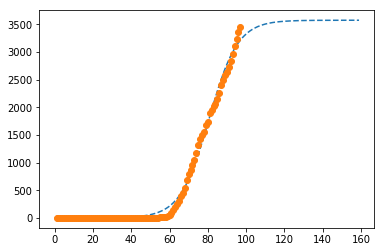

In [24]:
# Plot everything for illustration
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(0,160), y_fitted, '--', label='fitted')
ax.plot(x_data, y_data, 'o', label='Confirmed Data')

In [27]:
# make prediction by 06/01
pred = log_curve([132], k, x_0, ymax)

In [28]:
pred

array([3571.75453638])